# 1. INTRODUCTION

=================================================

## Milestone 4 

- Nama  : Bimantyo Arya Majid

- Dataset Summary : Dataset berisikan tentang data-data kondisi cuaca tertentu  seperti berawan, hujan, cerah dan kondisi saat matahari terbit, Dataset ini akan diolah menggunakan tensorflow, pandas, numpy

- Objective : Membuat model machine learning CNN (Convolutional Neural Network) untuk melakukan klasifikasi cuaca guna memberikan peringatan dini untuk transportasi, pertanian, atau operasi luar‑ruangan. Tujuan model ini tidak untuk menyaingi weather forecast seperti BMKG atau semacamnya namun untuk melengkapi dimana nantinya model ini akan diterapkan pada daerah daerah yang terpencil dan memiliki infrastruktur teknologi yang minim.

=================================================

# 2. IMPORT LIBRARIES
---
Berikut merupakan libraries yang akan digunakan selama pengerjaan project

In [ ]:
# Downgrade version of TensorFlow and tf-keras
!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 req

In [ ]:
# Menginstall Kaggle
!pip install -q kaggle # Install library kaggle
!mkdir -p ~/.kaggle # Buat folder .kaggle
!cp kaggle.json ~/.kaggle/ # Pindahkan file ke folder tersebut
!chmod 600 ~/.kaggle/kaggle.json # Ubah izin agar hanya bisa dibaca user

In [ ]:
# Melakukan Import Library yang akan digunakan
import os # Digunakan untuk berinteraksi dengan sistem file (folder dan path).
import cv2 # Digunakan untuk mengolah dan membaca gambar atau video.
import glob # Digunakan untuk mencari file dengan pola tertentu (misalnya semua .jpg dalam folder).
import random # Untuk mengacak atau memilih data secara acak.
from PIL import Image # Untuk membantu load image 
import shutil # Untuk menyalin file
import numpy as np # Untuk mempermudah pengolahan data 
import pandas as pd # Untuk mempermudah pengolahan data
import seaborn as sns # Untuk membantu memvisualisasikan data 
import matplotlib.pyplot as plt # Untuk membantu memvisualisasikan data 
import tensorflow as tf # Framework utama untuk deep learning, CNN, dan komputasi model neural network.
from tensorflow.keras.models import Model, Sequential # Untuk base classes membuat model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Untuk real-time image data augmentation and preprocessing
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, BatchNormalization # Untuk membantu pemrosesan core layers yang digunakan di CNNs and fully connected networks
from tensorflow.keras.applications import EfficientNetB0 # Sebagai base pretrained model untuk transfer learning
from tensorflow.keras.applications.efficientnet import preprocess_input # Untuk Scaleing image pixel values and normalizes input berdasarkan kebutuhan EfficientNet 
from sklearn.metrics import classification_report # Untuk menampilkan report keseluruhan hasil evaluasi
import warnings
warnings.filterwarnings('ignore')

# Check TensorFlow version
print(tf.__version__)

2.15.1


# 3. DATA LOADING
---
Pada bagian ini, akan dilakukan proses pemuatan dataset gambar cuaca. Project ini akan menggunakan dataset yang berasal dari Kaggle

Dataset : https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset

In [ ]:
# Mendownload Dataset yang berasal dari kaggle
!kaggle datasets download -d pratik2901/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/91.4M [00:00<?, ?B/s]
100% 91.4M/91.4M [00:00<00:00, 1.20GB/s]


In [ ]:
# Setiap dataset yang didownload melalui kaggle akan memiliki format file zip, maka perlu untuk melakukan unzip sebelum menggunakan dataset tersebut
!unzip -q ./multiclass-weather-dataset.zip

In [ ]:
# Melihat daftar file yang ada di folder Multi-class Weather Dataset
os.listdir('/content/Multi-class Weather Dataset')

['Cloudy', 'Rain', 'Sunrise', 'Shine']

Dataset yang sudah berhasil diunduh dan diextract berisikan gambaran cuaca yaitu *Rain*, *Cloudy*, *Shine*, *Sunrise*

In [ ]:
# Mendefinisikan path dataset
main_path = 'Multi-class Weather Dataset'

# Fungsi untuk mengecek dataset 
def check_path(path, seed=42):
  random.seed(seed)
  labels = sorted(os.listdir(path))
  total = 0
  for label in labels:
    num_data = len(os.listdir(os.path.join(path, label)))
    print(f'Total Data - {label} : {num_data}')
    total += num_data
  return total

# Mengecek jumlah data pada setiap label
total_data = check_path(main_path)
print(f'\nTotal Semua Data : {total_data}')

Total Data - Cloudy : 300
Total Data - Rain : 215
Total Data - Shine : 253
Total Data - Sunrise : 357

Total Semua Data : 1125


Total seluruh gambar pada dataset ini adalah 1125, dan distirbusi gambar di setiap kelasnya sebagai berikut.

- *Rain* memiliki 215 gambar
- *Cloudy* memiliki 300 gambar
- *Shine* memiliki 253 gambar
- *Sunrise* memiliki 357 gambar

## 3.1 Memvisualisasikan Sampel Gambar per Kelas

In [ ]:
# Fungsi untuk menampilkan 5 gambar dari setiap kelas
def plot_images(path, seed=42):
  random.seed(seed)
  labels = sorted(os.listdir(path))
  for label in labels:
    folder_path = os.path.join(path, label)
    fig = plt.figure(figsize=(20, 20))
    columns = 5
    rows = 1
    print('Kelas : ', label)
    images = sorted(os.listdir(folder_path))
    for index in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, index)
        image = plt.imread(os.path.join(folder_path, images[index]))
        plt.imshow(image)
        plt.axis("off")
    plt.show()

Kelas :  Cloudy


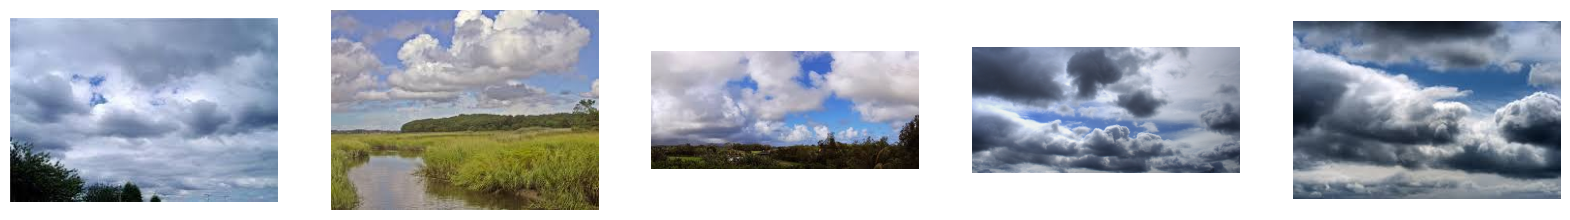

Kelas :  Rain


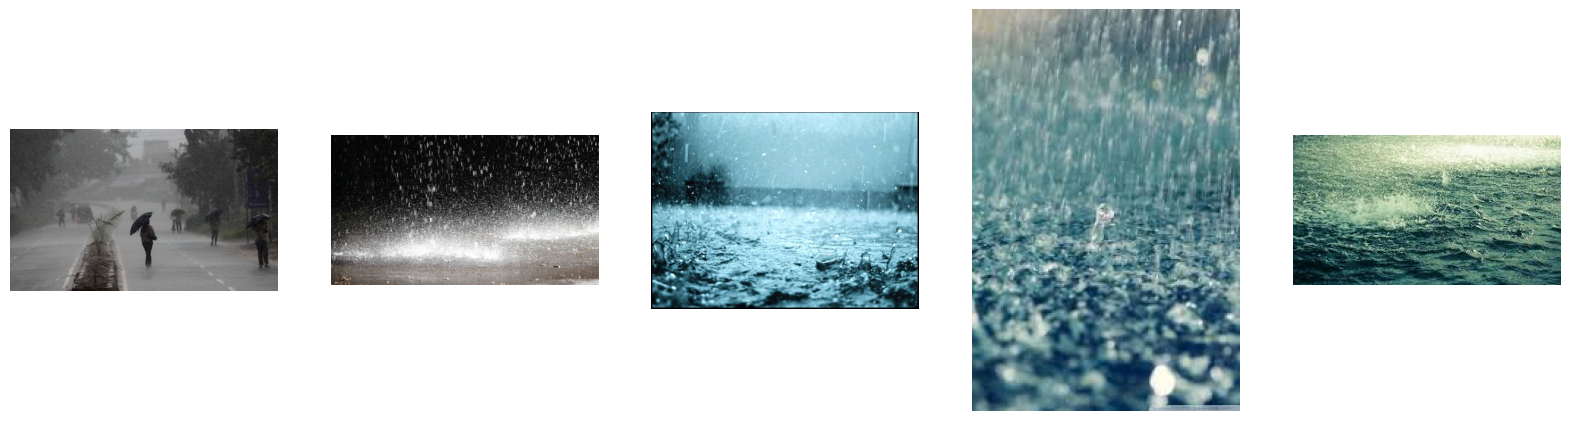

Kelas :  Shine


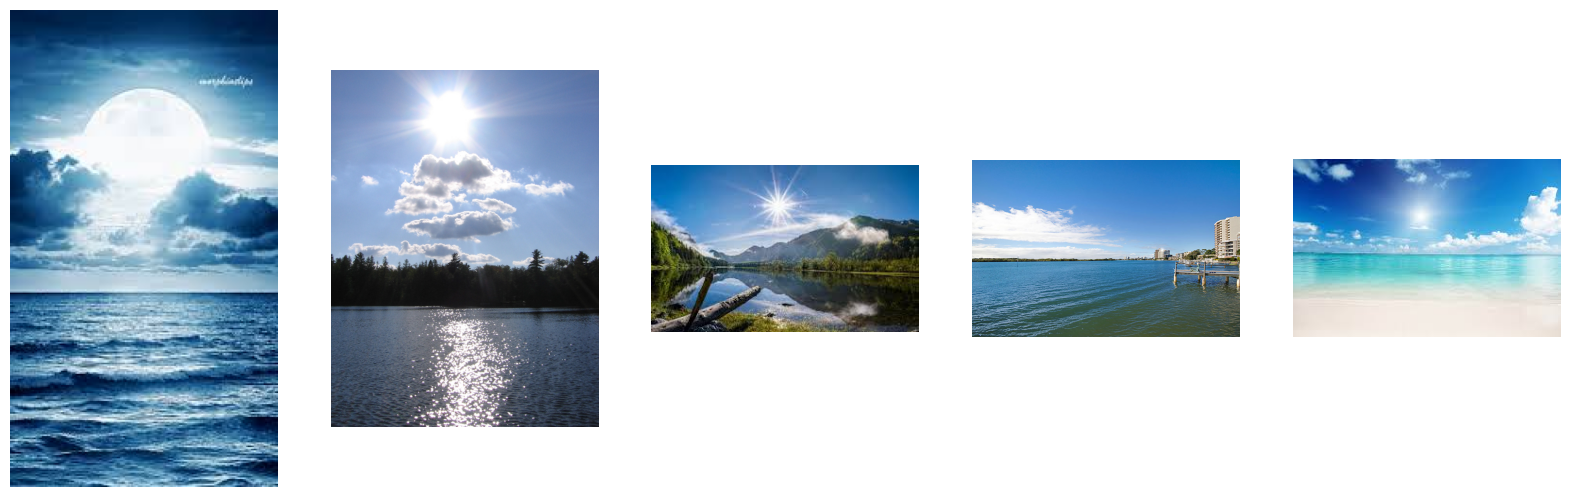

Kelas :  Sunrise


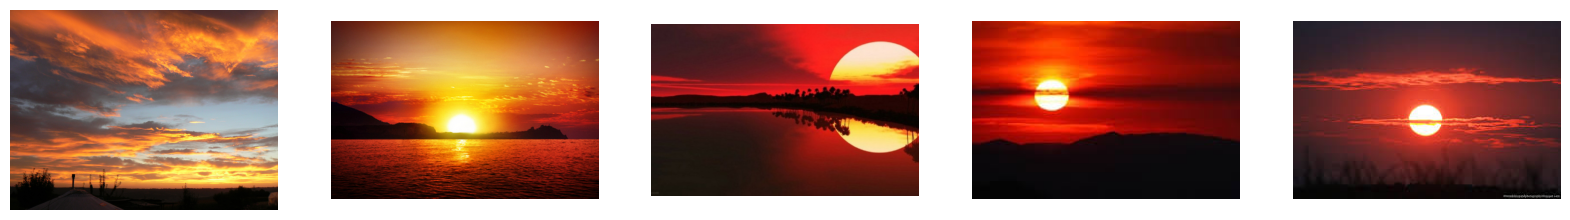

In [ ]:
# Memvisualisasikan gambar dari setiap kelas
plot_images(main_path, seed=42)

# 4. EXPLORATORY DATA ANALYSIS (EDA)
---
Pada bagian ini akan dilakukan proses eksplorasi lebih lanjut terhadap dataset cuaca untuk memahami karakteristik setiap kelasnya

## 4.1 Menampilkan Distribusi Sampel Gambar per kelas

In [ ]:
# Menampilkan distribusi sampel gambar per kelas dalam bar plot
def plot_class_distribution(path):
    labels = os.listdir(path)
    class_counts = {}

    for label in labels:
        folder_path = os.path.join(path, label)
        if os.path.isdir(folder_path):
            count = len(os.listdir(folder_path))
            class_counts[label] = count

    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title("Distribusi Jumlah Gambar per Kelas")
    plt.ylabel("Jumlah Gambar")
    plt.xlabel("Label Cuaca")
    plt.show()

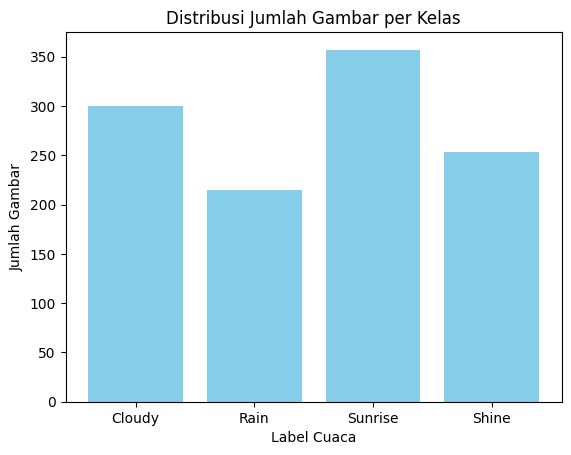

In [ ]:
# Menampilkan distribusi setiap kelas 
plot_class_distribution(main_path)

Berdasarkan hasil syntax diatas dapat diketahui bahwa dataset yang digunakan tergolong imbalanced meskipun tidak terlalu ekstrem dengan distribusi masing masing kelas

- Total Data - Cloudy : 300 atau dalam persentase 26.7%
- Total Data - Rain : 215 atau dalam persentase 19.1%
- Total Data - Sunrise : 357 atau dalam persentase 31.7%
- Total Data - Shine : 253 atau dalam persentase 22.5%

- Total Semua Data : 1125 sama dengan 100%

Dataset yang bersifat imbalance akan mempengaruhi performa model karena model cenderung belajar lebih banyak dari kelas mayoritas, dan hal ini akan membuat model cenderung memprediksi ke kelas yang memiliki jumlah paling banyak, karena jumlah kelas yang minim data akan cenderung lebih sulit untuk diprediksi oleh model.

Sehubungan dengan kelas yang mendominasi pada dataset adalah Sunrise dan Clody maka model dapat mengalami bias terhadap kelas Sunrise dan Cloudy. Nantinya akan dilakukan penanganan data imbalance dengan Data Augmentation

## 4.2 Melakukan Check Terhadap Color Channel Pada Seluruh Data Gambar

In [ ]:
# Fungsi untuk mengecek Color Channel terhadap seluruh data gambar 
def check_channels(path):
    channel_count = {}
    for label in os.listdir(path):
        label_path = os.path.join(path, label)
        for fname in os.listdir(label_path):
            fpath = os.path.join(label_path, fname)
            try:
                img = Image.open(fpath)
                mode = img.mode
                channel_count[mode] = channel_count.get(mode, 0) + 1
            except:
                continue
    print("Distribusi mode warna:", channel_count)

In [ ]:
# Menampilkan Distribusi mode warna 
check_channels(main_path)

Distribusi mode warna: {'RGB': 1120, 'L': 2, 'P': 2, 'RGBA': 1}


Berdasarkan hasil pengecekan terhadap Color Channel pada dataset, ditemukan beberapa gambar yang tidak memiliki Color Channel yang sama yaitu terdapat Color Channel 'L' dalam mode Grayscale sebanyak 2 Data, 'P' dalam mode Palettized sebanyak 2 data dan 'RGBA' RGB + Alpha channel (transparansi) sebanyak 1 data. Maka dari itu perlu dilakukan konversi agar mendapatkan data yang konsisten dan tidak menyebabkan error disaat penerapan terhadap model

### 4.2.1 Melakukan Konversi Terhadap Data Gambar Yang Tidak Memiliki Color Channel RGB

In [ ]:
# Fungsi untuk mengkonversi semua gambar ke RGB dalam dataset
def convert_all_images_to_rgb(path):
    """
    Mengkonversi semua gambar dalam subfolder ke RGB.
    Folder utama diasumsikan memiliki struktur per kelas.
    """

    labels = sorted(os.listdir(path))  # Ambil semua nama folder kelas

    for label in labels:
        label_path = os.path.join(path, label)  # Path ke folder kelas
        image_files = os.listdir(label_path)  # Ambil semua nama file gambar

        for image_name in image_files:
            image_path = os.path.join(label_path, image_name)  # Path lengkap ke gambar

            try:
                img = Image.open(image_path)  # Membuka gambar

                if img.mode != 'RGB':
                    # Jika mode gambar bukan RGB, ubah ke RGB
                    img = img.convert('RGB')

                    # Simpan ulang gambar di tempat yang sama (overwrite)
                    img.save(image_path)

                    print(f"✔️ Dikoversi ke RGB: {image_path}")

                # Jika sudah RGB, lewati
            except Exception as e:
                print(f"❌ Gagal memproses {image_path}: {e}")

In [ ]:
# Melakukan convert terhadap data yang tidak memiliki color channel RGB 
convert_all_images_to_rgb(main_path)

✔️ Dikoversi ke RGB: Multi-class Weather Dataset/Cloudy/cloudy71.jpg
✔️ Dikoversi ke RGB: Multi-class Weather Dataset/Cloudy/cloudy66.jpg
✔️ Dikoversi ke RGB: Multi-class Weather Dataset/Rain/rain141.jpg
✔️ Dikoversi ke RGB: Multi-class Weather Dataset/Shine/shine131.jpg
✔️ Dikoversi ke RGB: Multi-class Weather Dataset/Shine/shine127.jpg


In [ ]:
# Melakukan pengecekan ulang untuk color channel data 
check_channels(main_path)

Distribusi mode warna: {'RGB': 1125}


Sekarang semua dataset memiliki Color Channel yang sama yaitu RGB

## 4.3 Menampilkan Perbandingan Ukuran Gambar (Tinggi dan Gambar) Setiap Label dalam Dataset


Label: Cloudy


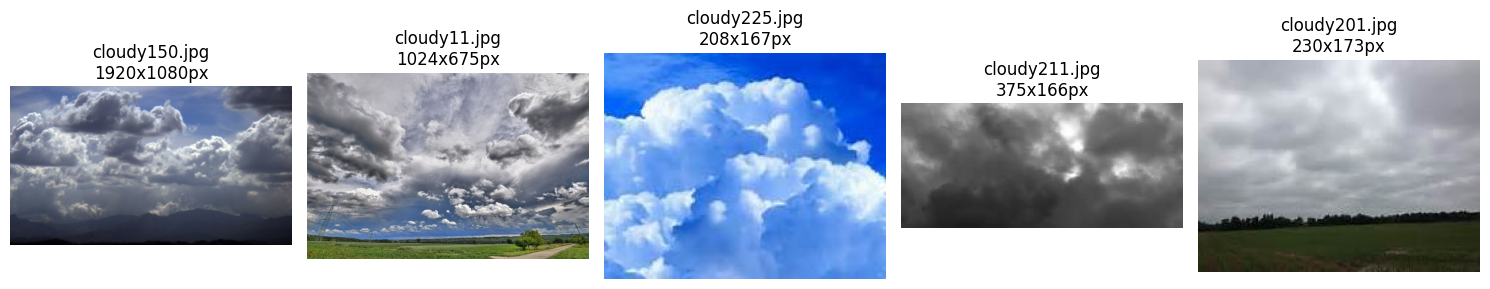


Label: Rain


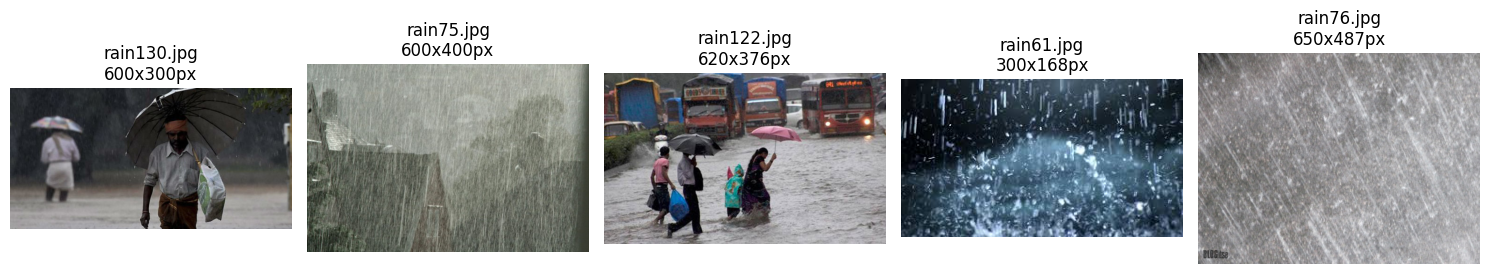


Label: Shine


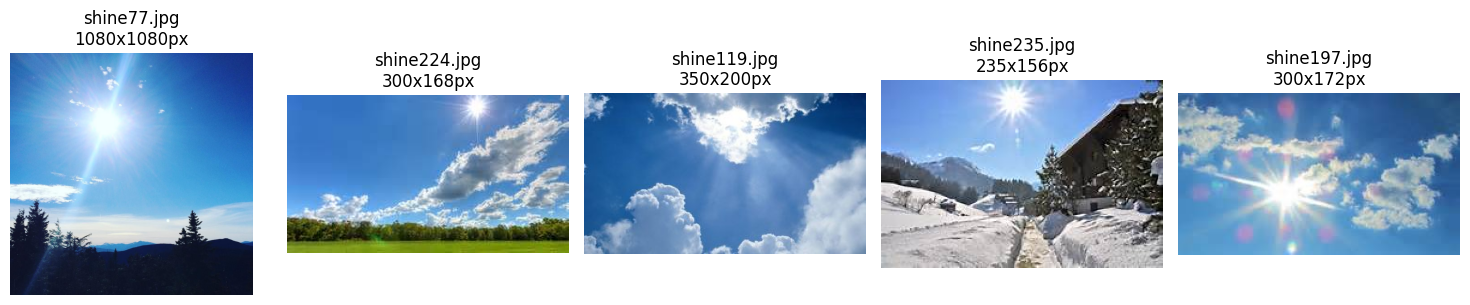


Label: Sunrise


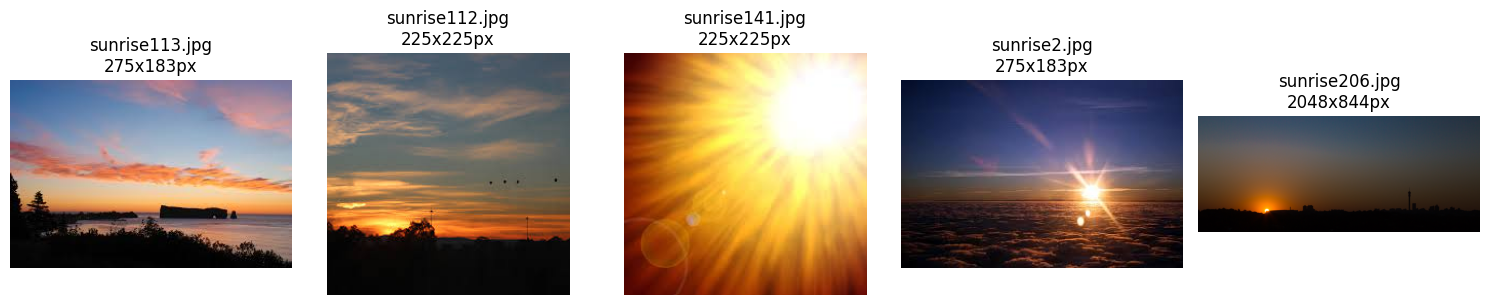

In [ ]:
# Gambar yang mau ditampilkan per kelas
n_samples_per_class = 5
seed = 42  # Seed untuk hasil yang konsisten
random.seed(seed)

# Loop per kelas
for label in sorted(os.listdir(main_path)):
    class_path = os.path.join(main_path, label)
    img_files = sorted(os.listdir(class_path))  # pastikan list stabil
    img_files = random.sample(img_files, min(n_samples_per_class, len(img_files)))  # ambil acak tapi konsisten

    print(f"\nLabel: {label}")
    plt.figure(figsize=(15, 3))

    for i, fname in enumerate(img_files):
        img_path = os.path.join(class_path, fname)
        try:
            img = Image.open(img_path)
            width, height = img.size

            # Tampilkan gambar
            plt.subplot(1, n_samples_per_class, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{fname}\n{width}x{height}px')

        except Exception as e:
            print(f"Error on {fname}: {e}")

    plt.tight_layout()
    plt.show()

In [ ]:
# Membuat fungsi untuk mengecek rata-rata ukuran tiap gambar
def check_average_image_size(path):
    total_width = 0
    total_height = 0
    count = 0

    labels = os.listdir(path)
    for label in labels:
        folder_path = os.path.join(path, label)
        images = os.listdir(folder_path)

        for img_name in images:
            img_path = os.path.join(folder_path, img_name)
            try:
                img = Image.open(img_path)
                width, height = img.size
                total_width += width
                total_height += height
                count += 1
            except:
                continue

    if count == 0:
        print("Tidak ada gambar ditemukan.")
        return

    avg_width = total_width / count
    avg_height = total_height / count

    print(f"Jumlah gambar    : {count}")
    print(f"Rata-rata Width  : {avg_width:.2f} px")
    print(f"Rata-rata Height : {avg_height:.2f} px")
    print(f"Rata-rata Ukuran : {avg_width:.2f} x {avg_height:.2f} px")

In [ ]:
# Mengecek rata rata ukuran pixel gambar 
check_average_image_size('Multi-class Weather Dataset')

Jumlah gambar    : 1125
Rata-rata Width  : 506.30 px
Rata-rata Height : 334.75 px
Rata-rata Ukuran : 506.30 x 334.75 px


Berdasarkan hasil syntax diatas dapat diketahui bahwa setiap gambar memiliki ukuran yang berbeda-beda sedangkan model CNN tidak bisa menerima gambar yang memiliki ukuran berbeda-beda karena pemrosesan batch training memerlukan ukuran konsisten di seluruh data, ukuran data yang besar bisa memberatkan komputasi, dan ukuran data terlalu kecil bisa menyebabkan kehilangan fitur yang penting.

Maka dari itu nantinya akan dilakukan proses resize untuk menyamakan ukuran setiap gambar agar dapat di proses dengan mudah oleh CNN

## 4.4 Menampilkan Histogram Warna Untuk Setiap Kelas

In [ ]:
# Menampilkan histogram warna setiap kelasnya
def plot_rgb_histogram_per_class(path, sample_per_class=5, seed=42):
    random.seed(seed)  # Tetapkan seed agar acak tetap konsisten
    labels = sorted(os.listdir(path))

    for label in labels:
        folder_path = os.path.join(path, label)
        images = sorted(os.listdir(folder_path))

        if len(images) < sample_per_class:
            print(f"Jumlah gambar di kelas {label} kurang dari {sample_per_class}")
            continue

        # Ambil gambar secara acak namun stabil
        selected_images = random.sample(images, sample_per_class)

        print(f"\nKelas: {label}")
        for fname in selected_images:
            img_path = os.path.join(folder_path, fname)
            img = cv2.imread(img_path)

            # Validasi RGB
            if img is None or len(img.shape) != 3 or img.shape[2] != 3:
                print(f"Gagal membaca gambar (bukan RGB): {img_path}")
                continue

            # Ubah ke RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Pisahkan channel
            r, g, b = cv2.split(img_rgb)

            # Plot histogram
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(img_rgb)
            plt.axis("off")
            plt.title(f"Gambar - {label}")

            plt.subplot(1, 2, 2)
            plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
            plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
            plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
            plt.title("Histogram RGB")
            plt.xlabel("Pixel Value")
            plt.ylabel("Frequency")
            plt.legend()
            plt.tight_layout()
            plt.show()


Kelas: Cloudy


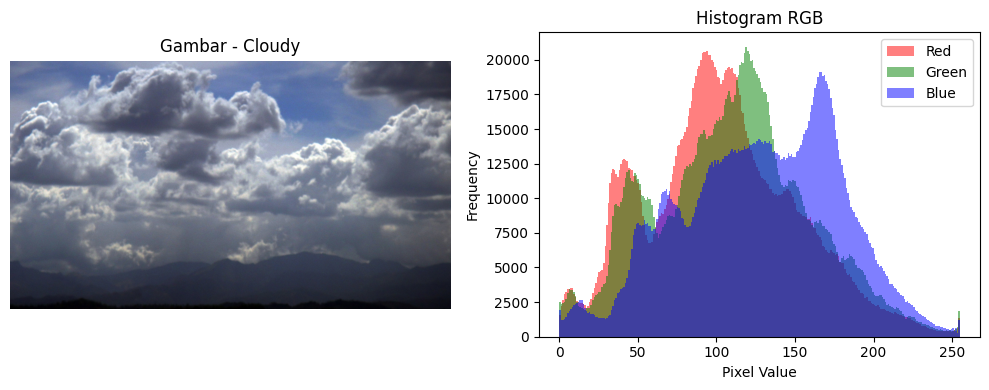

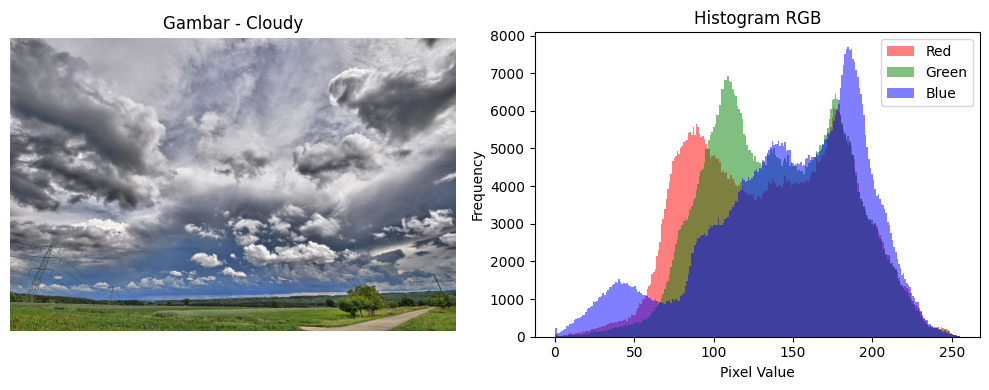

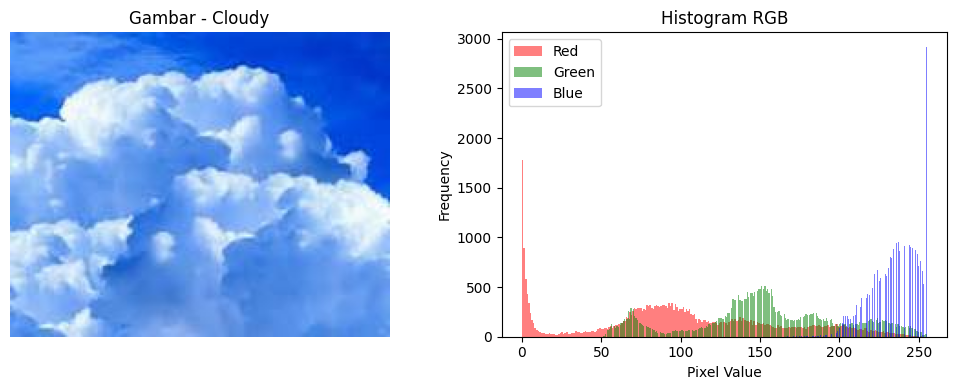

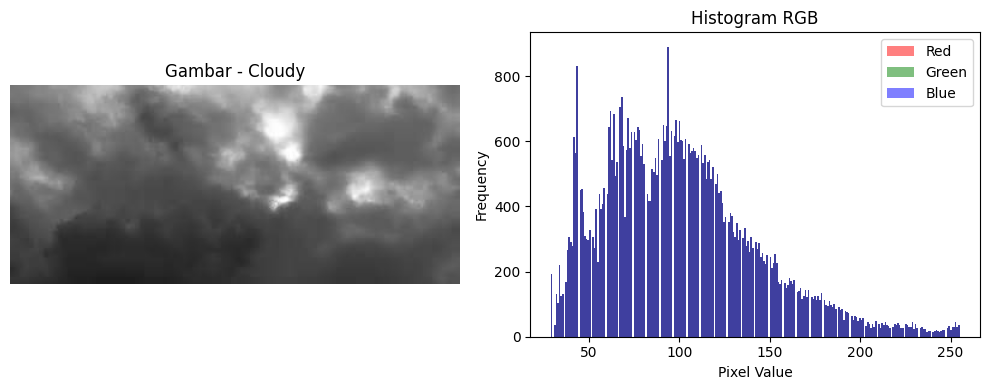

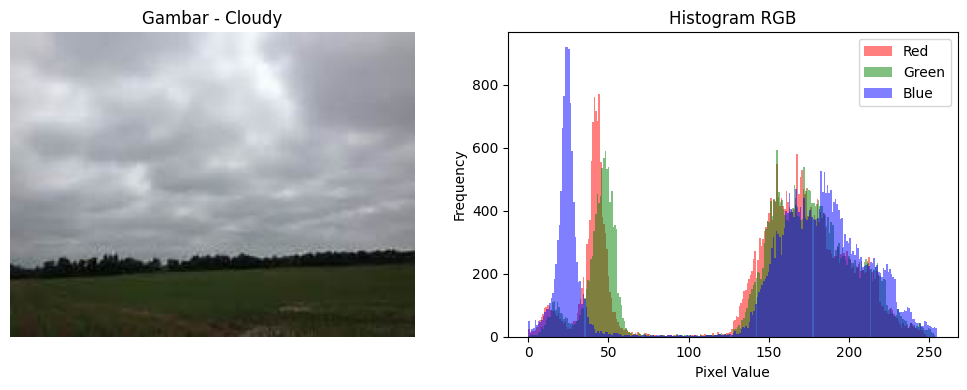


Kelas: Rain


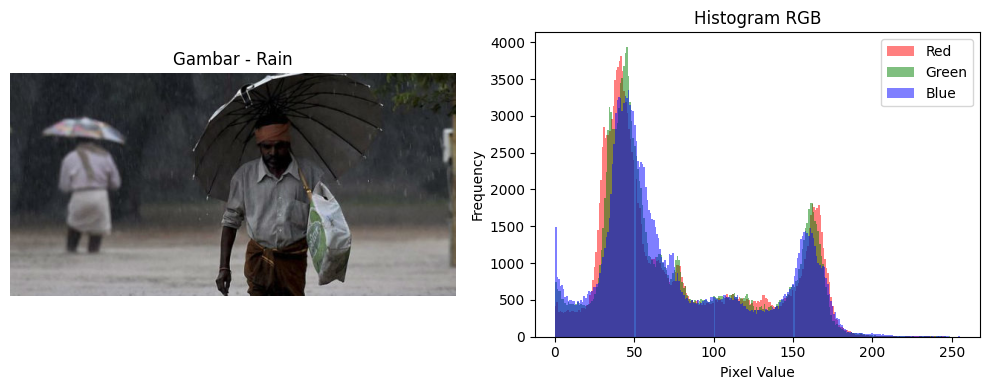

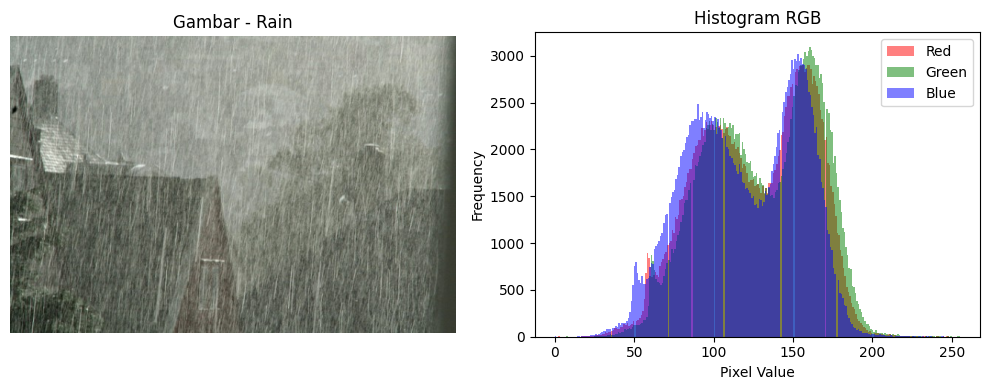

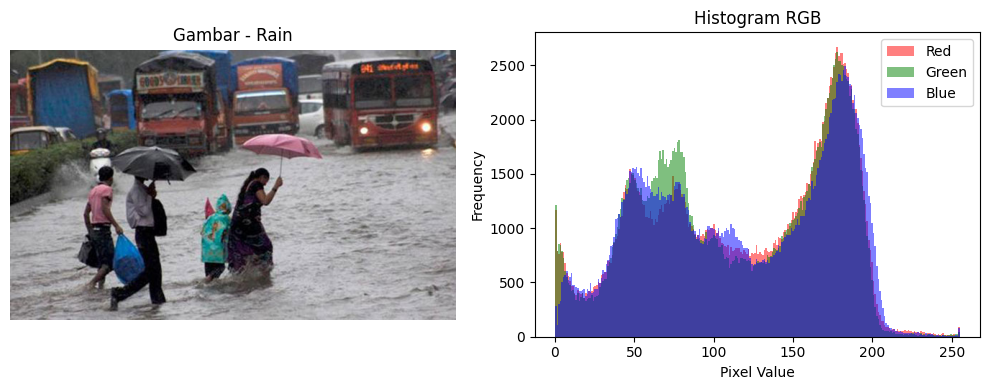

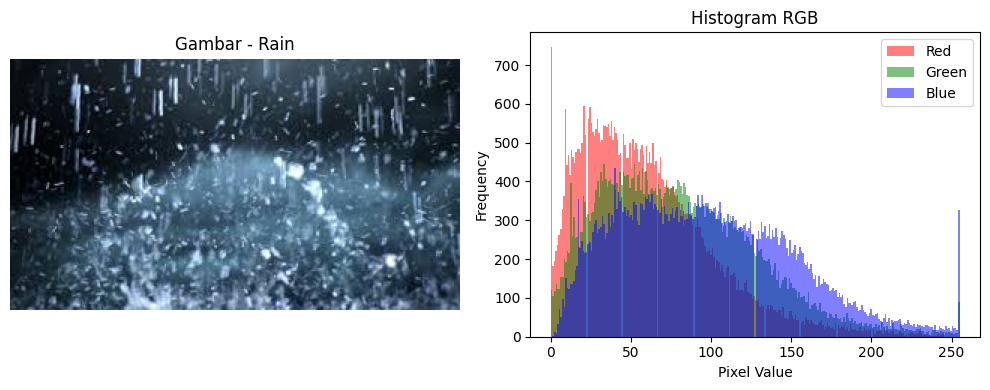

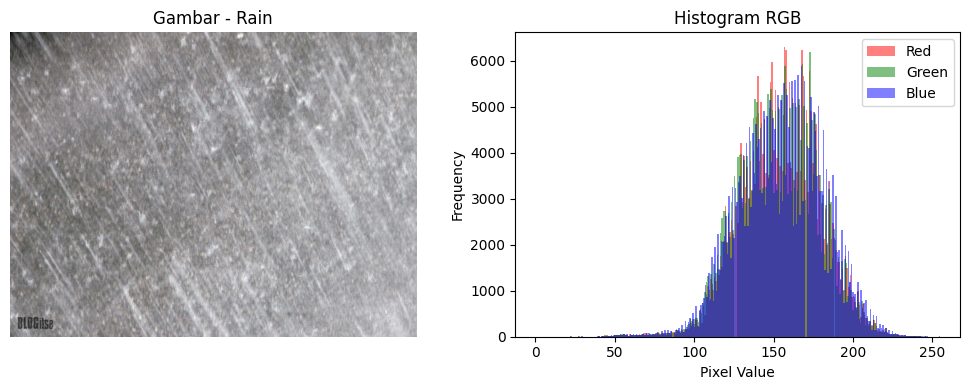


Kelas: Shine


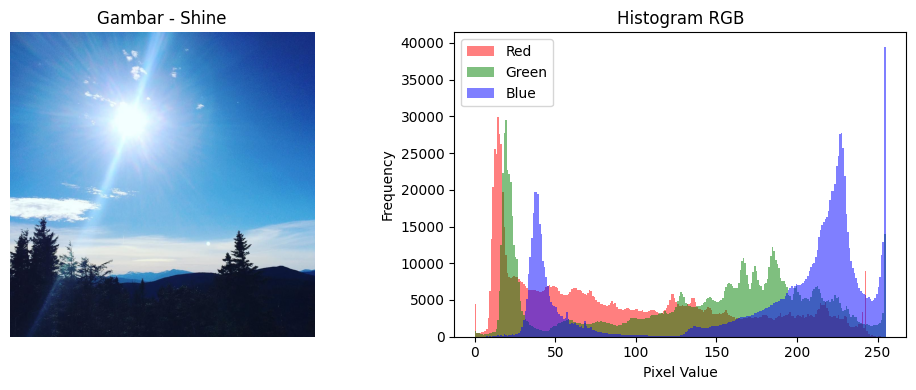

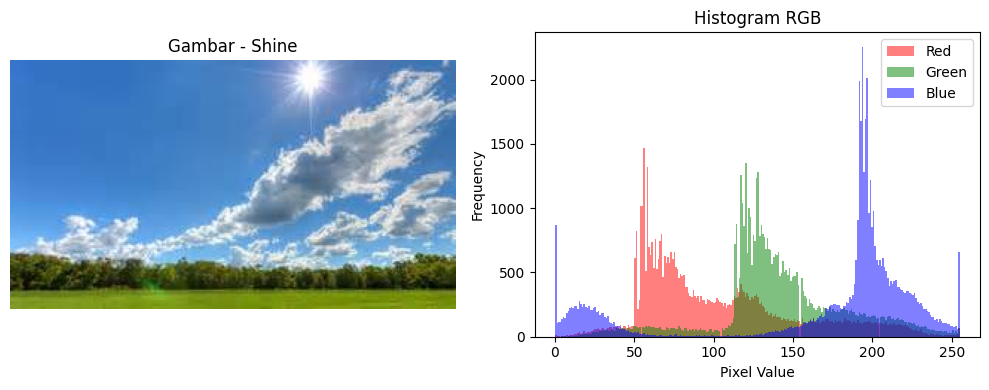

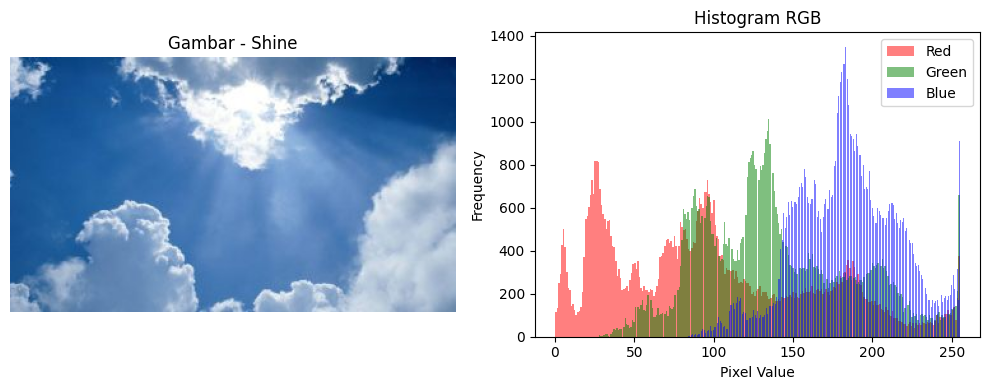

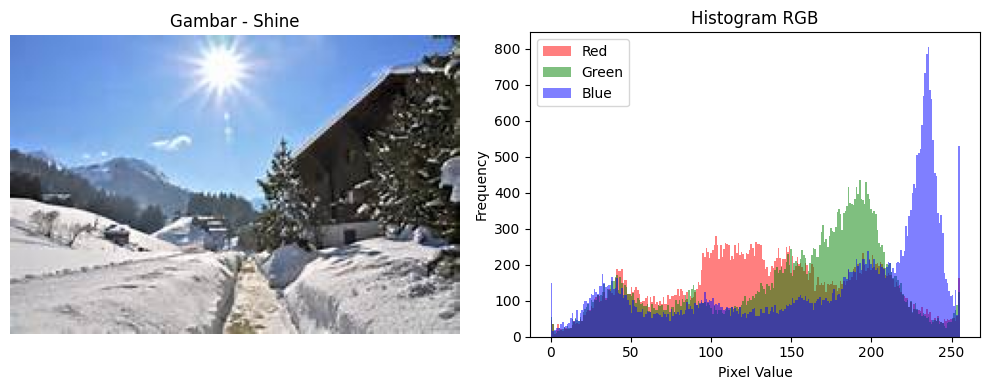

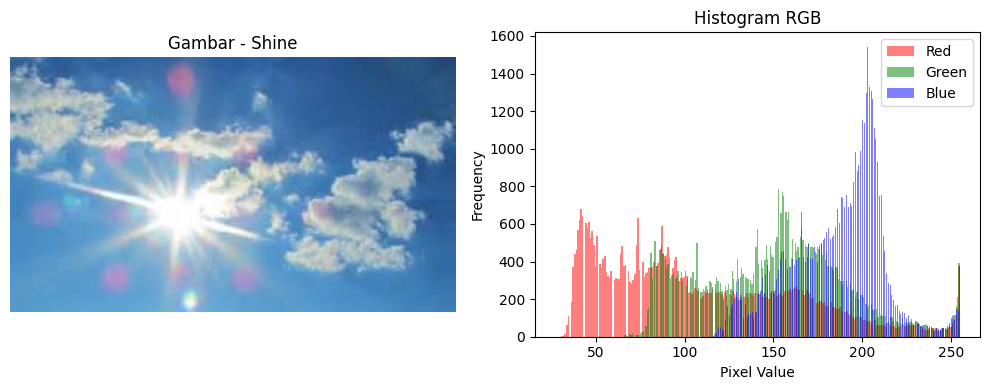


Kelas: Sunrise


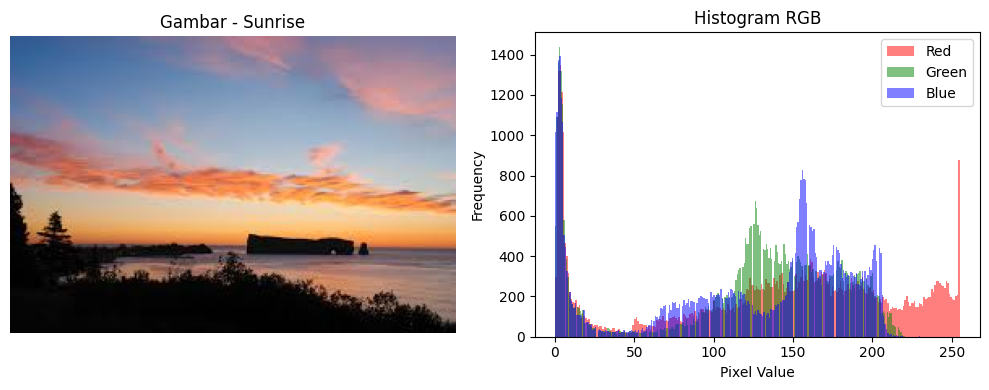

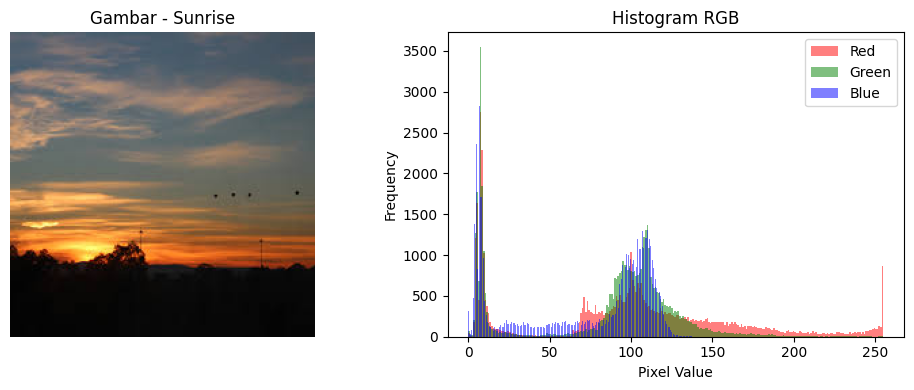

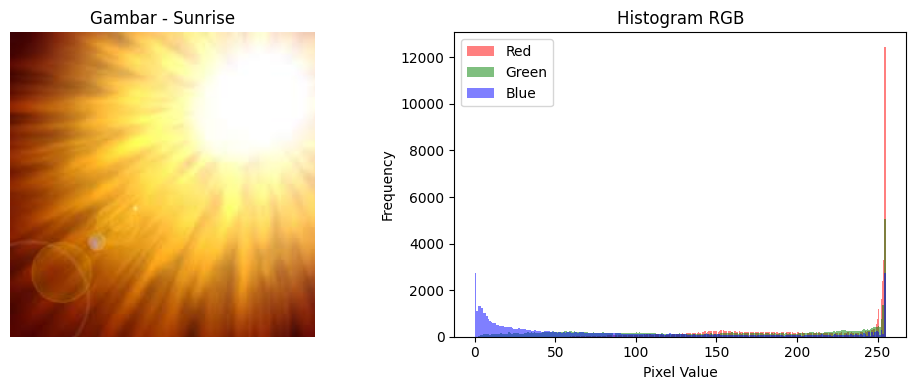

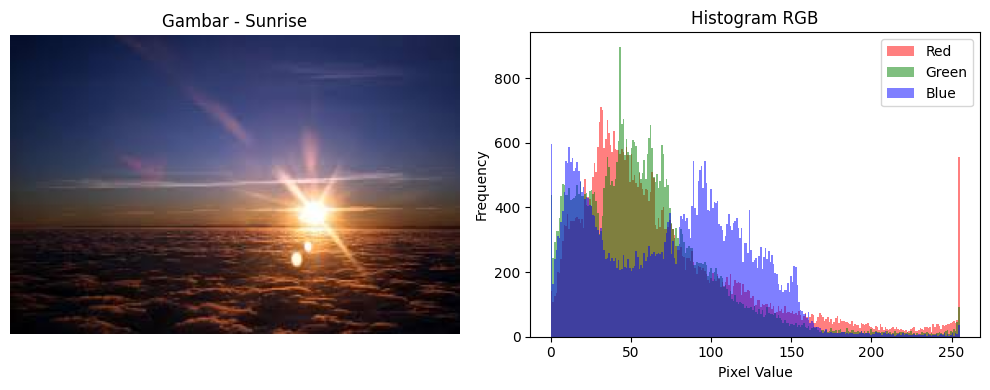

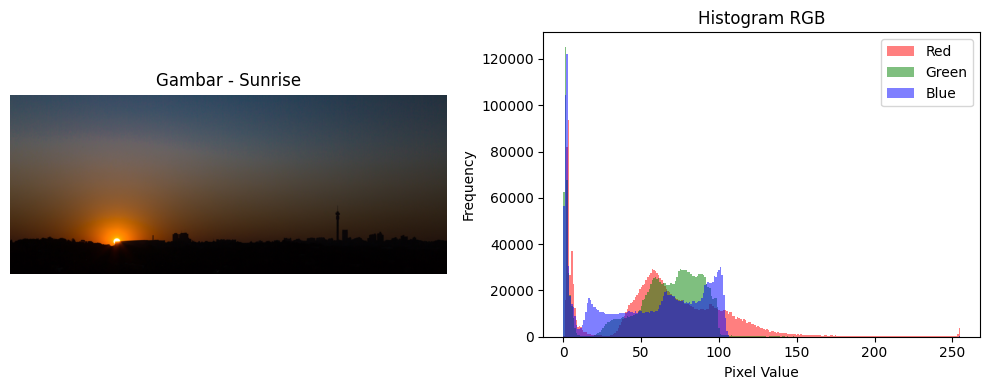

In [ ]:
# Menampilkan histogram per kelas 
plot_rgb_histogram_per_class(main_path, seed=42)

In [ ]:
# Menampilkan rata rata histogram rgb setiap kelas
def plot_avg_rgb_histogram_per_class(path, bins=256):
    labels = os.listdir(path)

    # Loop untuk setiap sub folder
    for label in labels:
        folder_path = os.path.join(path, label)
        files = os.listdir(folder_path)
        r_hist_total = np.zeros(bins)
        g_hist_total = np.zeros(bins)
        b_hist_total = np.zeros(bins)
        count = 0

        for fname in files:
            fpath = os.path.join(folder_path, fname)
            img = cv2.imread(fpath)
            if img is None:
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Mengubah gambar dari format BGR ke RGB (urutan warna standar).
            r, g, b = cv2.split(img_rgb) # Memisahkan gambar RGB menjadi 3 channel terpisah (R, G, B) dalam bentuk array grayscale.

            r_hist = cv2.calcHist([r], [0], None, [bins], [0, 256]).flatten() # Menghitung histogram untuk channel merah
            g_hist = cv2.calcHist([g], [0], None, [bins], [0, 256]).flatten() # Menghitung histogram untuk channel hijau
            b_hist = cv2.calcHist([b], [0], None, [bins], [0, 256]).flatten() # Menghitung histogram untuk channel biru

            r_hist_total += r_hist
            g_hist_total += g_hist
            b_hist_total += b_hist
            count += 1

        if count == 0:
            continue

        # Menghitung rata-rata histogram dengan membagi total histogram dengan jumlah gambar.
        r_avg = r_hist_total / count
        g_avg = g_hist_total / count
        b_avg = b_hist_total / count

        # Plot rata-rata histogram
        plt.figure(figsize=(8, 4))
        plt.title(f"Rata-rata Histogram RGB - {label}")
        plt.plot(r_avg, color='red', label='Red')
        plt.plot(g_avg, color='green', label='Green')
        plt.plot(b_avg, color='blue', label='Blue')
        plt.xlabel("Pixel Value")
        plt.ylabel("Rata-rata Frekuensi")
        plt.legend()
        plt.tight_layout()
        plt.show()

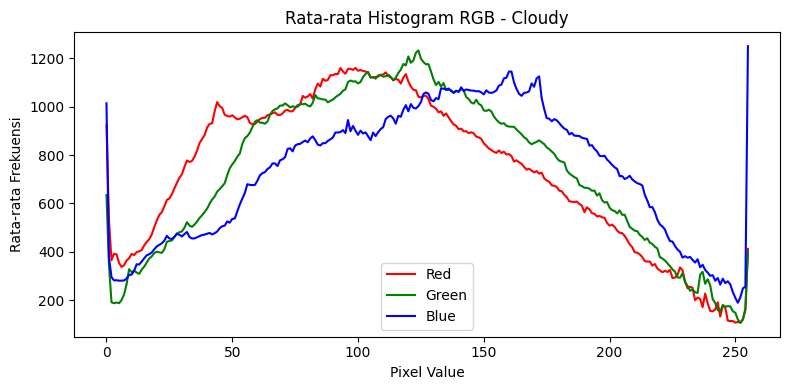

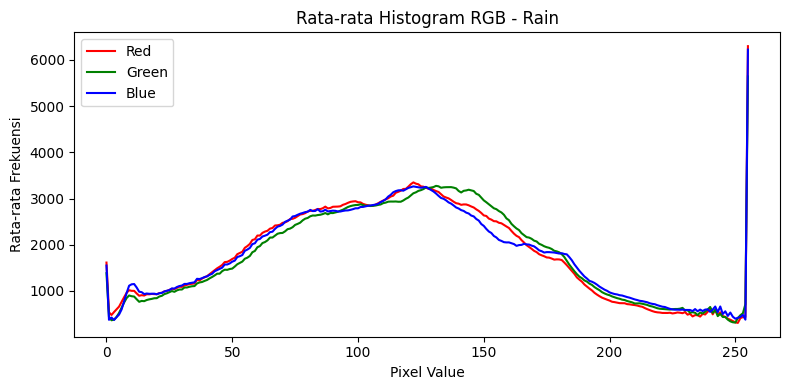

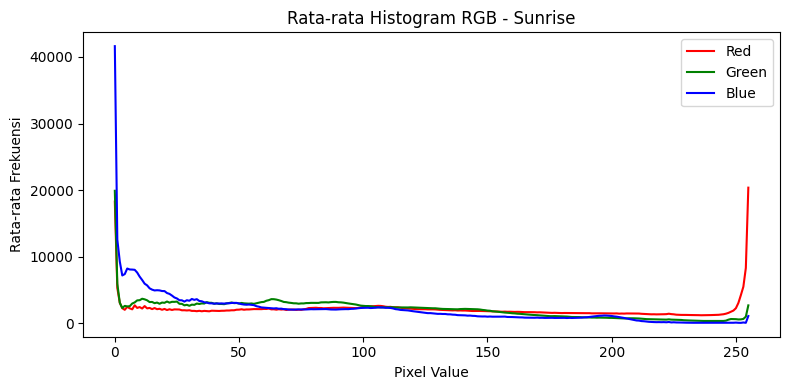

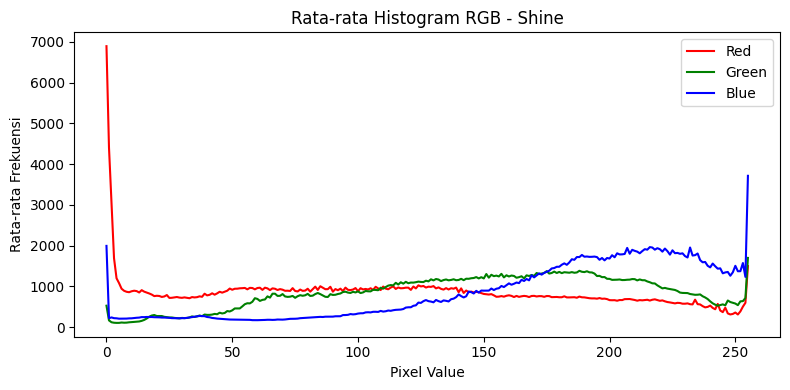

In [ ]:
# Menampilkan rata rata histogram RGB setiap kelas
plot_avg_rgb_histogram_per_class("Multi-class Weather Dataset")

Berdasarkan hasil rata-rata histogram rgb diatas dapat diketahui bahwa pada kelas

1. *Cloudy*

- Kelas *Cloudy* memiliki distribusi warna paling menyebar berada diantara nilai 50-200 dimana mayoritas warna pada spektrum merah, hijau dan biru memiliki rentang yang hampir sama. Hal ini menyatakan bahwa pada kelas Cloudy di dominasi oleh warna abu abu gelap menuju terang. bisa jadi banyak gambar yang memiliki kondisi berawan namun masih terdapat kondisi yang sedikit cerah

- Terdapat lonjakan di pixel 0 dan 255 dimana dapat menandakan bahwa kondisi *Cloudy* tidak sepenuhnya gelap — karena sifat awan menyebarkan cahaya secara luas, masih bisa menghasilkan area yang sangat terang.

2. *Rain*

- Kelas *Rain* memiliki distribusi warna paling banyak berada di tengah (nilai 75–160) dimana mayoritas warna dari gambar-gambar hujan berada pada tingkat keabuan, abu-abu terang, dan warna sedang.

- Hal ini cukup wajar karena saat hujan, gambar cenderung memiliki pencahayaan mendung, sedikit kontras, dan tidak terlalu cerah maupun terlalu gelap.

- Terdapat lonjakan di pixel value 255 hal ini menandakan bahwa ada area putih terang dalam banyak gambar, dimana area putih tersebut bisa jadi berasal dari refleksi air, perickan hujan atau terang lampu.

- Channel pada warna biru sedikit mendominasi dari pada warna merah dan hijau hal ini cukup berkaitan karena pada saat hujan cenderung memiliki warna biru yang dominan seperti warna langit yang gelap, permukaan air  dan lain lain

3. *Sunrise*

-  Kelas *Sunrise* memiliki distribusi warna yang cenderung flat namun menunjukkan lonjakan pada pixel 0 dan 255 pada spektrum warna merah dan biru. Lonjakan yang terdapat pada spektrum warna biru menunjukkan bahwa banyak area biru yang sangat gelap, hal ini bisa terjadi karena bayangan atau langit dini hari dengan warna biru gelap. Sedangkan lonjakan yang terdapat pada spektrum warna merah menunjukkan bahwa banyak area yang sangat terang dengan nuansa merah khas matahari terbit.

- Spektrum warna hijau terlihat netral dan menyebar tidak terlalu dominan, cenderung menjadi penyeimbang warna.


4. *Shine*

- Kelas *Shine* memiliki distribusi warna yang cenderung rendah tidak terlalu fluktuatif dimana pada pixel 0 terdapat spektrum warna merah yang sangat tinggi. Hal ini menandakan bahwa banyak gambar yang memiliki area gelap pekat pada spektrum warna merah bisa jadi shadow/ backlight yang cukup sering terjadi jika mengambil gambar yang berhadapan langsung dengan matahari

- Terdapat lonjakan di pixel 255 pada spektrum warna biru dimana menandakan terdapat cahaya yang sangat terang, dan spektrum warna hijau memiliki frequensi yang stabil dimana menunjukkan adanya tone netral atau alami, seperti dedaunan atau rumput pada saat siang hari.

## 4.5 Melakukan Analisa Kontras Pada Setiap Kelas Berdasarkan Standar Deviasi Pixel

In [ ]:
# Fungsi untuk menghitung kontras berdasarkan standar deviasi pixel
def contrast_stddev_per_class(path):
    class_stddev = {}  # Dictionary untuk menyimpan hasil rata-rata kontras tiap kelas

    labels = sorted(os.listdir(path))  # Ambil label kelas dari folder

    for label in labels:
        folder_path = os.path.join(path, label)  # Path folder gambar per kelas
        images = os.listdir(folder_path)  # List semua gambar dalam kelas

        stddev_list = []  # List untuk menyimpan nilai standar deviasi setiap gambar

        for image_name in images:
            img_path = os.path.join(folder_path, image_name)  # Path lengkap gambar
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar dalam grayscale

            if img is None:
                print(f"Gagal membaca gambar: {img_path}")
                continue

            # Hitung standar deviasi piksel dan mengukur sebaran intensitas cahaya
            std = np.std(img)
            stddev_list.append(std)

        # Hitung rata-rata standar deviasi per kelas
        mean_stddev = np.mean(stddev_list) if stddev_list else 0
        class_stddev[label] = mean_stddev

        print(f"Rata-rata kontras (std dev) kelas '{label}': {mean_stddev:.2f}")

    return class_stddev

In [ ]:
# Menampilkan rata rata standar deviasi kontras 
stddev_contrast_result = contrast_stddev_per_class(main_path)

Rata-rata kontras (std dev) kelas 'Cloudy': 49.27
Rata-rata kontras (std dev) kelas 'Rain': 46.68
Rata-rata kontras (std dev) kelas 'Shine': 52.17
Rata-rata kontras (std dev) kelas 'Sunrise': 53.63


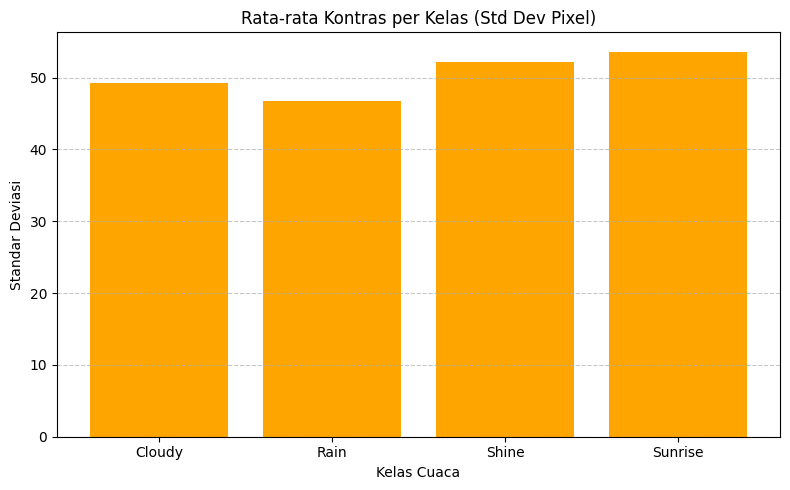

In [ ]:
# Visualisasi hasil kontras standar deviasi per kelas
plt.figure(figsize=(8, 5))
plt.bar(stddev_contrast_result.keys(), stddev_contrast_result.values(), color='orange')
plt.title('Rata-rata Kontras per Kelas (Std Dev Pixel)')
plt.ylabel('Standar Deviasi')
plt.xlabel('Kelas Cuaca')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan hasil pengecekan nilai rata rata kontras pada setiap kelas diketahui bahwa rata-rata nilai std dev kelas 'Cloudy' adalah 49.27, rata-rata nilai std dev kelas 'Rain' adalah 46.68, rata-rata nilai std dev kelas 'Shine' adalah 52.17, dan rata-rata nilai std dev kelas 'Sunrise' adalah 53.63.

- Kelas *Sunrise*

Memiliki nilai rata-rata std dev paling tinggi yang mengartikan rata-rata gambar sunrise memiliki rentang kecerahan yang sangat lebar. Hal ini cukup masuk akal karena sunrise biasanya pada gambar sunrise mengandung area yang sangat terang dan area yang sangat gelap. Karakteristik visual yang tajam bisa membantu CNN untuk menjadi fitur pembeda.

- Kelas *Shine*

Memiliki nilai rata-rata std dev yang cenderung tinggi pula yang mengartikan kelas ini memiliki kontras yang cukup tinggi. Hal ini juga sesuai dengan cuaca cerah yang memberikan pencahayaan yang kontras

- Kelas *Cloudy*

Memiliki nilai rata-rata std dev yang lebih rendah daripada kelas Sunrise dan Shine dimana, hal ini menandakan bahwa kelas Cloudy memiliki nilai kontras yang lebih sedikit namun tidak terlalu rendah. Hal ini sesuai dengan cuaca berawan yang biasanya memiliki cahaya yang lebih menyebar dan tidak terlalu terang namun masih bisa membedakan antara warna awan dan langit.

- Kelas *Rain*

Memiliki nilai rata-rata std dev yang paling rendah daripada kelas lainnya, hal ini menandakan bahwa mayoritas gambarnya memiliki kontras yang rendah dan cenderung gelap. Hal ini juga sangat sesuai bahwasannya ketika hujan biasanya terjadi dengan kondisi pencahayaan yang cukup gelap/minim karena tertutup oleh awan. Kelas Rain bisa jadi menjadi kelas yang paling sulit dideteksi karena tekstur dan warna gambar tidak terlalu bervariasi.

# 5. FEATURE ENGINEERING

Pada bagian ini akan dilakukan proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, preprocessing, dan penggunaan Data Augmentation

## 5.1 Proses Melakukan Split Data Train, Test, Val

Sehubungan dengan Dataset yang masih mentah belum dilakukan split untuk Data train, test dan validation maka perlu dilakukan split terlebih dahulu sebelum memasukkan ke dalam model tensorflow. Pembagian Dataset akan menggunakan pertimbangan

- 70 % untuk data Train
- 15 % untuk data Validation
- 15 % untuk data Test

Mempertimbangkan jumlah dataset yang hanya memiliki total 1125, pembagian tersebut cukup baik mengingat dataset yang dimiliki tidak terlalu banyak. Sehingga tidak terjadi timpang antara data test dan data train. Nantinya 70% dari data train sebanyak 787 gambar, 15% dari data validation sebanyak 169 gambar, dan 15% dari data test sebanyak 169 gambar

In [ ]:
# Set random seed agar hasil split selalu konsisten
random.seed(42)

# Folder tujuan untuk split dataset
split_dirs = ['train', 'validation', 'test']
split_ratio = [0.7, 0.15, 0.15]  # 70% train, 15% val, 15% test

# Pastikan direktori split belum ada agar tidak duplikat atau nested error
for d in split_dirs:
    split_path = os.path.join(main_path, d)
    if os.path.exists(split_path):
        shutil.rmtree(split_path)  # hapus folder lama jika ada

# Loop tiap kelas (Rain, Shine, dst)
for class_name in os.listdir(main_path):
    class_dir = os.path.join(main_path, class_name)

    # Skip jika bukan folder atau folder split (training/validation/testing)
    if not os.path.isdir(class_dir) or class_name in split_dirs:
        continue

    # Ambil semua file gambar dalam folder kelas
    all_images = os.listdir(class_dir)
    random.shuffle(all_images)  # acak urutan gambar

    total_images = len(all_images)

    # Hitung jumlah data untuk setiap split
    train_count = int(split_ratio[0] * total_images)
    val_count = int(split_ratio[1] * total_images)
    test_count = total_images - train_count - val_count  # sisanya untuk test

    split_data = {
        'train': all_images[:train_count],
        'validation': all_images[train_count:train_count + val_count],
        'test': all_images[train_count + val_count:]
    }

    # Salin file gambar ke folder split masing-masing
    for split in split_dirs:
        split_class_dir = os.path.join(main_path, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)  # buat folder jika belum ada

        for fname in split_data[split]:
            src = os.path.join(class_dir, fname)
            dst = os.path.join(split_class_dir, fname)

            # Pastikan yang disalin adalah file, bukan folder
            if os.path.isfile(src):
                shutil.copy2(src, dst)

print("Split dataset selesai dilakukan dengan sukses.")

Split dataset selesai dilakukan dengan sukses.


Kemudian membuat direktori untuk masing masing folder agar memudahkan pemanggilan

In [ ]:
# Membuat shortcut untuk masing masing folder
train_path = os.path.join(main_path, 'train')
val_path = os.path.join(main_path, 'validation')
test_path = os.path.join(main_path, 'test')

Proses split test telah berhasil dilakukan dan menghasilkan 3 buah folder Train, Test, dan Validation

## 5.2 Mendefinisikan Parameter Untuk Resize

Parameter berikut dipilih untuk pra-pemrosesan gambar sebelum dimasukkan ke model

- img_height = 224
- img_weight = 224
- batch_size = 32

In [ ]:
# Mendefinisikan parameter untuk preprocessing gambar
img_height = 224
img_width = 224
batch_size = 32

- Ukuran **224x224 pixel** merupakan input dimensi yang sering digunakan di dalam banyak model Convolutional Neural Network(CNN) dan banyak model yang bisa menerima input dimensi tersebut dan menghasilkan performa yang cukup baik seperti VGG dan Resnet.

- Pemilihan ukuran standar ini akan membantu ketika nantinya akan menggunakan teknik transfer learning dengan model-model yang kompatibel dengan input dimensi tersebut. Salah satunya EfficientNetB0. Pada dataset memiliki variansi data pixel gambar yang berbeda beda, dengan penggunaan dimensi yang lebih kecil akan membantu mengurangi beban komputasi.

- Penggunaan *batch_size* = 32 dikarenakan ukuran tersebut merupakan ukuran yang umum dan sering digunakan dalam pelatihan model deep learning, penggunaan batch_size 32 juga tidak terlalu berat dan cenderung ringan sehingga tidak terlalu memberatkan dari segi komputasi

## 5.3 Penerapan Data Augmentation terhadap Dataset dengan ImageDataGenerator

- Data augmentation merupakan salah satu teknik untuk meningkatkan pembeda, ukuran secara artificial ke dalam dataset train. Hal ini berfungsi untuk memberikan variansi terhadap model sehingga model mampu mengeneralisir antar data dan mampu memiliki performansi yang lebih baik terhadap data yang belum pernah dilihat.

- Transformasinya dapat berupa Flipping, Rotating, Cropping, Zooming, Adjust brightness dan contrast serta menambahkan noise ke dalam dataset gambar

- Beberapa keuntungan menggunakan Data Augmentation yaitu dapat mengecilkan potensi overfitting, meningkatkan model untuk mampu mengeneralisasi data. Namun penggunaan Data augmentation juga harus memiliki landasan tidak bisa asal menentukan parameternya.

In [ ]:
# Membuat batch generator untuk train-set, val-set dan test-set
train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,              # Normalisasi
                                                                    rotation_range=45,            # Rotasi acak
                                                                    zoom_range=0.1,               # Zoom acak
                                                                    shear_range=0.2,              # Transformasi geser sudut
                                                                    horizontal_flip=True,         # Flip secara Horizontal
                                                                    vertical_flip=True,           # Flip secara Vertikal
                                                                    brightness_range=[0.5, 1.5],  # Penyesuaian Brightness
                                                                    fill_mode='nearest'           # Metode untuk menghasilkan ruang kosong
                                                                    )

train_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                      target_size=(img_height,img_width),
                                                      batch_size=batch_size,
                                                      class_mode='sparse',
                                                      shuffle=True,
                                                      seed=seed)

val_set_aug = train_datagen_aug.flow_from_directory(val_path,
                                                      target_size=(img_height,img_width),
                                                      batch_size=batch_size,
                                                      class_mode='sparse',
                                                      shuffle=True,
                                                      seed=seed)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set_aug = test_datagen_aug.flow_from_directory(test_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    seed=seed)

Found 786 images belonging to 4 classes.
Found 167 images belonging to 4 classes.
Found 172 images belonging to 4 classes.


Berdasarkan hasil Data Augmentation didapatkan

- Train set : 786 gambar dari 4 kelas
- Validation set : 167 gambar dari 4 kelas
- Test set : 172 gambar dari 4 kelas

Pembagian set mencakupi kelas *Cloudy*, *Rain*, *Shine*, *Sunrise*. Pembagian ini memastikan model dapat belajar, divalidasi dan diuji dengan baik.

Justifikasi pemilihan parameter pada Data Augmentation.

Agar model mampu mengeneralisasi dengan biak dan menghindari overfitting, maka perlu diterapkan proses Data Augmentation dengan parameter

- ``` rescale=1./255 ``` = Untuk melakukan normalisasi nilai pixel gambar dari rentang 0-255 menjadi rentang 0-1, guna membuat data menjadi seragam dan lebih stabil. Proses ini sama seperti scalling.

- ``` rotation_range=45 ``` = Untuk melakukan rotasi gambar sebanyak 45 derajat, guna membantu model mengenali cuaca dari berbagai orientasi.

- ``` zoom_range=0.1 ``` = Untuk melakukan proses zoom secara acak sebanyak 10%, guna mensimulasikan tingkat kedekatan objek yang berbeda pada gambar.

- ``` shear_range=0.2 ``` = Untuk melakukan transformasi geser memberikan prespektif tambahan yang mungkin muncul pada kondisi nyata.

- ``` horizontal_flip=True ``` = Untuk melakukan transformasi membalik gambar secara horizontal, guna memperluas keragaman posisi gambar tanpa merubah konteks objek.

- ``` vertical_flip=True ``` = Untuk melakukan transformasi membalik gambar secara vertical, guna memperluas keragaman posisi gambar tanpa merubah konteks objek.

- ``` brightness_range=[0.5, 1.5] ``` = Untuk mengubah kecerahan gambar secara acak antara 50% hingga 150% dari kecerahan aslinya, guna memberikan prespektif baru dan mensimulasikan pada dunia nyata dimana hasil pengambilan gambar dapat dipengaruhi oleh kondisi pencahayaan.

- ``` fill_mode='nearest' ``` = Untuk menambahkan spot kososng ketika gambar dilakukan proses rotasi, geser ataupun zoom, guna mengisi spot kosong tersebut agar tidak membuat model menjadi bingung. Penggunaan 'nearest' akan menentukan bahwa spot kosong tersebut akan diisi dengan gambar terdekat dari area kosong tersebut.

In [ ]:
# Menampilkan Label
print(train_set_aug.class_indices)

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}


Model akan mengenali kelas berdasarkan index numerik

- 0 sebagai *Cloudy*
- 1 sebagai *Rain*
- 2 sebagai *Shine*
- 3 sebagai *Sunrise*

Pengurutan label ini di encode berdasarkan abjad dan dilakukan oleh ImageDataGenerator

# 6. ANN TRAINING (Sequential API)

## 6.1 Model Definition

Pada bagian ini akan dilakukan pendefinisian model dengan arsitektur Convolutional Neural Network (CNN) menggunakan Sequential API.

### 6.1.1 Menyiapkan Clear Session dan Set Seed

In [ ]:
# Clear session dan set seed
seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Fungsi dari clear_session untuk membersihkan memori dan menghapus model sebelumnya yang mungkin masih tersimpan di dalam backend. Jika tidak dilakukan proses clear_session nantinya akan menimpa hasil dan mempengaruhi model.

kemudian np.random_seed dan tf.random.Set_seed digunakan untuk memastikan bahwa proses pelatihan dapat direproduksi agar proses acak akan menghasilkan hasil yang konsisten pada setiap kali model dijalankan.

### 6.1.2 Pembuatan struktur CNN dengan Sequential API

In [ ]:
# Membuat Model CNN dengan Sequential API
model_aug = Sequential() # Seolah olah membuat list kosong, kalo sequential dimulai dari 1

# Layer Konvolusi 1
model_aug.add(Conv2D(16, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed),
                     input_shape=(img_height, img_width,3)))
model_aug.add(MaxPooling2D(2,2))

# Layer Konvolusi 2
model_aug.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_aug.add(MaxPooling2D(2,2))

# Flatten dan Fully Connected Layer
model_aug.add(Flatten())
model_aug.add(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_aug.add(Dense(4, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output menyesuaikan jumlah kelas

# Compile model
model_aug.compile(loss='sparse_categorical_crossentropy', # loss menggunakan sparse karena data sudah di encode menggunakan ordinal
                         optimizer='adam',
                         metrics=['accuracy'])

# Model Summary
model_aug.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 64)                5

Justifikasi pemilihan parameter pada penggunaan Model CNN Sequential API

- Penggunaan ```Conv2D``` berfungsi sebagai layer konvolusi 2D untuk mengekstrak fitur gambar (tepi, warna, pola). Tidak ada acuan berapa jumlah filter yang seharusnya digunakan, namun direkomendasikan menggunakan kelipatan 2. Pada Layar konvolusi pertama menggunakan jumlah filter 16 kemudian pada layar konvolusi kedua menggunakan jumlah filter 32. Pada activation='relu' berfungsi sebagai aktivasi ReLU yang digunakan agar model belajar pola non-linear.

- Penggunaan ```MaxPooling2D``` berfungsi sebagai layer pooling untuk mengurangi ukuran fitur dan kompleksitas model.

- Penggunaan ```flatten()``` berfungsi untuk mengubah data dari bentuk 3D menjadi 1D sebelum masuk ke layer Dense.

- Penggunaan ```softmax``` berfungsi sebagai fungsi aktivasi untuk klasifikasi multi-kelas. Hasil output akan berupa probabilitas total = 1

- Penggunaan ```loss='sparse_categorical_crossentropy'``` digunakan ketika label target berupa angka(0-3), lebih cocok untuk multi-kelas.

- Penggunaan ```optimizer='adam'``` berfungsi sebagai algoritma optimasi untuk mempercepat dan menstabilkan training.

- Penggunaan ```metrics=['accuracy']``` berfungsi untuk mengukur seberapa akurat model dalam memprediksi.

Menghasilkan total parameter sebanyak 5,977,380.

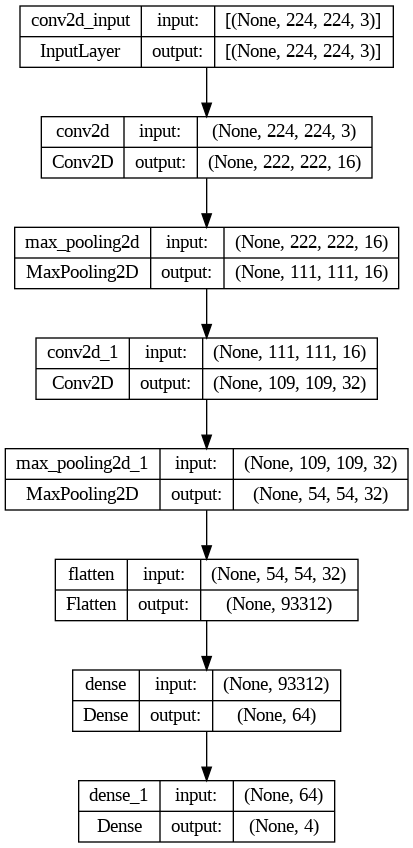

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_aug, show_shapes=True)

## 6.2 Model Training

Pada bagian ini akan diterapkan .fit terhadap train set dan validation set

In [ ]:
# Model training
%%time
history_aug = model_aug.fit(train_set_aug, epochs=20, validation_data=val_set_aug, batch_size=batch_size)

Epoch 1/20
25/25 [==============================] - 49s 2s/step - loss: 13.4847 - accuracy: 0.4186 - val_loss: 1.1197 - val_accuracy: 0.6766
Epoch 2/20
25/25 [==============================] - 48s 2s/step - loss: 1.0603 - accuracy: 0.7061 - val_loss: 1.0984 - val_accuracy: 0.5808
Epoch 3/20
25/25 [==============================] - 47s 2s/step - loss: 0.6928 - accuracy: 0.7634 - val_loss: 0.6666 - val_accuracy: 0.8263
Epoch 4/20
25/25 [==============================] - 52s 2s/step - loss: 0.6385 - accuracy: 0.7875 - val_loss: 0.7049 - val_accuracy: 0.7605
Epoch 5/20
25/25 [==============================] - 47s 2s/step - loss: 0.6136 - accuracy: 0.8028 - val_loss: 0.5518 - val_accuracy: 0.8323
Epoch 6/20
25/25 [==============================] - 48s 2s/step - loss: 0.5268 - accuracy: 0.8168 - val_loss: 0.6411 - val_accuracy: 0.8024
Epoch 7/20
25/25 [==============================] - 47s 2s/step - loss: 0.5199 - accuracy: 0.8232 - val_loss: 0.7333 - val_accuracy: 0.8144
Epoch 8/20
25/25 [=

Berdasarkan 20 epoch model memiliki hasil akhir

- loss = 0.32
- accuracy = 0.88
- val_loss = 0.43
- val_accuracy = 0.89

Hal ini menandakan model belajar dengan baik dimana akurasi sudah di atas 80% pada training dan validasi. Model cenderung tidak overfitting dimana selisih accuracy dan val_accuracy cukup kecil, model tidak hanya menghafal data train. Nantinya masih bisa dilakukan Model Improvement dengan menggunakan metode Transfer Learning

## 6.3 Model Evaulation

Pada bagian ini akan dilakukan evaluasi terhadap performansi model dan percobaan terhadap test set

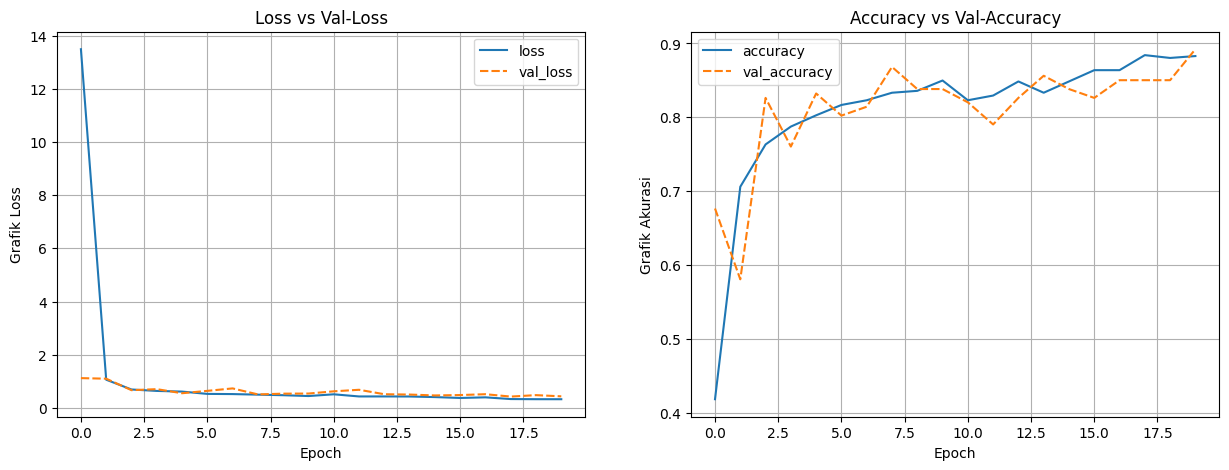

In [ ]:
# Plot Hasil training
history_aug_df = pd.DataFrame(history_aug.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_aug_df[['loss', 'val_loss']])
plt.grid()
plt.ylabel('Grafik Loss')
plt.xlabel('Epoch')
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_aug_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.ylabel('Grafik Akurasi')
plt.xlabel('Epoch')
plt.title('Accuracy vs Val-Accuracy')
plt.show()

- Berdasarkan Grafik Loss dan VaL-Loss diketahui bahwa model belajar dengan cepat melihat loss pertama turun drastis dari 13 pada epoch pertama kemudian menuju angka 1 pada epoch kedua. Kemudian diikuti grafik yang landai dan stabil sampai ke epoch 10, dapat dikatakan bahwa model memiliki performa yang baik sehingga tidak terjadi overfit.

- Berdasarkan Grafik Accuracy dan Val-Accuracy diketahui bahwa kedua garis naik dengan konsisten, terjadi lonjakan yang cukup tinggi pada epoch ke 2 pada val-accuracy dimana pada epoch ke 2 val-accuracy memiliki nilai 0.58 dan pada epoch ke 3 val-accuracy naik menjadi 0.82 dapat dikatakan bahwa model dapat mengeneralize dengan baik dan akurasi 88-89%.

In [ ]:
# Mengecek performansi pada test set

# Mendapatkan probabilitas
y_pred_prob_aug = model_aug.predict(test_set_aug)

# Mendapatkan kelas dengan maximum probabilitas
y_pred_class_aug = np.argmax(y_pred_prob_aug, axis=-1)

# Menampilkan Classification Report
print(classification_report(test_set_aug.classes, y_pred_class_aug, target_names=np.array(list(train_set_aug.class_indices.keys()))))

6/6 [==============================] - 3s 392ms/step
              precision    recall  f1-score   support

      Cloudy       0.82      0.80      0.81        45
        Rain       0.80      0.97      0.88        33
       Shine       0.91      0.77      0.83        39
     Sunrise       0.96      0.96      0.96        55

    accuracy                           0.88       172
   macro avg       0.87      0.88      0.87       172
weighted avg       0.88      0.88      0.88       172



Berdasarkan hasil Classification Report diketahui pada

- Kelas *Cloudy* model dapat memprediksi kelas tersebut dengan 82% ketepatan hal ini terbilang cukup baik dan tidak begitu buruk, tetapi kelas cloudy memiliki nilai recall 80% dimana mayoritas berhasil diprediksi dengan benar.

- Kelas *Rain* model sedikit kesusahan memprediksi kelas tersebut dengan 80% ketepatan namun memiliki performa recall yang sangat baik  sebesar 97% dimana hal ini menandakan model bisa membedakan kelas rain namun masih ragu.

- Kelas *Shine* model dapat memprediksi kelas tersebut dengan cukup baik sebesar 91% ketepatan namun memiliki nilai recall yang paling rendah dibandingkan kelas lainnya yaitu sebesar 77%, hal ini menandakan bahwa model masih bingung untuk membedakan kelas shine.

- Kelas *Sunrise* memiliki performansi paling baik dengan nilai ketepatan sebesar 96% dan nilai recall sebesar 96% hal ini bisa terjadi karena sunrise memiliki fitur yang paling mencolok daripada kelas kelas yang lain.

Secara keseluruhan model pada ANN Training memiliki performansi yang cukup baik namun masih banyak ruang untuk melakukan improvement. Maka pada model ANN Improvement akan dilakukan penerapan parameter yang berbeda dan penggunaan transfer learning agar model memiliki performansi yang lebih baik daripada ANN Training.

# 7. ANN IMPROVEMENT (Sequential API)

## 7.1 Model Definition

Pada bagian ini akan dilakukan pendefinisian model dengan arsitektur Convolutional Neural Network (CNN) menggunakan Sequential API dan beberapa optimizer serta transfer learning dengan tujuan untuk meningkatkan performa model. Pada ANN Improvement akan dilakukan penerapan beberapa optimizer dan menggunakan Transfer Learning untuk meningkatkan performa model dengan menggunakan GlobalAveragePooling2D, BatchNormalization dan Dropout()

### 7.1.1 Menyiapkan Clear Session dan Set Seed

In [ ]:
# Clear session dan set seed
seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Fungsi dari clear_session untuk membersihkan memori dan menghapus model sebelumnya yang mungkin masih tersimpan di dalam backend. Jika tidak dilakukan proses clear_session nantinya akan menimpa hasil dan mempengaruhi model.

kemudian np.random_seed dan tf.random.Set_seed digunakan untuk memastikan bahwa proses pelatihan dapat direproduksi agar proses acak akan menghasilkan hasil yang konsisten pada setiap kali model dijalankan.

### 7.1.2 Pendefinisian Pre-Trained Model menggunakan EfficientNetB0

In [ ]:
# Mendefinisikan Pre-Trained Model untuk Transfer Learning
pretrained_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height,img_width, 3))
pretrained_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


Penggunaan transfer learning ```EfficientNetB0``` karena merupakan salah satu model transfer learning yang optimal untuk dataset dengan ukuran sedang dan kompleksitas menengah. ```EfficientNetB0``` memiliki parameter kurang lebih 5 juta lebih sedikit daripada VGG dan ResNet jadi lebih hemat komputasi.

### 7.1.3 Pembuatan Data Augmentation Baru Untuk Proses Transfer Learning

Pembuatan Data Augmentation baru perlu dilakukan untuk menyesuaikan kebutuhan transfer learning

In [ ]:
# Membuat batch generator untuk train-set, val-set dan test-set
train_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=45,             # Rotasi acak
                                                                    zoom_range=0.1,               # Zoom acak
                                                                    shear_range=0.2,              # Transformasi geser sudut
                                                                    horizontal_flip=True,         # Flip secara Horizontal
                                                                    vertical_flip=True,           # Flip secara Vertikal
                                                                    brightness_range=[0.5, 1.5],  # Penyesuaian Brightness
                                                                    fill_mode='nearest',          # Metode untuk menghasilkan ruang kosong
                                                                    preprocessing_function=preprocess_input)

train_set_tl = train_datagen_tl.flow_from_directory(train_path,
                                                      target_size=(img_height,img_width),
                                                      batch_size=batch_size,
                                                      class_mode='sparse',
                                                      shuffle=True,
                                                      seed=seed)

val_set_tl = train_datagen_tl.flow_from_directory(val_path,
                                                      target_size=(img_height,img_width),
                                                      batch_size=batch_size,
                                                      class_mode='sparse',
                                                      shuffle=True,
                                                      seed=seed)

test_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_set_tl = test_datagen_tl.flow_from_directory(test_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    seed=seed)

Found 786 images belonging to 4 classes.
Found 167 images belonging to 4 classes.
Found 172 images belonging to 4 classes.


Secara struktur hampir sama dengan pembuatan Data Augmentation di awal namun hanya berbeda pada proses scaling dimana pada ```Transfer Learning``` menggunakan preprocess_input yang sudah mewakili fungsi scaling/ normalization.

Berdasarkan hasil Data Augmentation didapatkan

- Train set : 786 gambar dari 4 kelas
- Validation set : 167 gambar dari 4 kelas
- Test set : 172 gambar dari 4 kelas

### 7.1.4 Pembuatan struktur CNN dengan Sequential API dan Improvement menggunakan Transfer Learning

In [ ]:
# Buat model dengan Sequential API
model_aug_tl = Sequential()

# Tambahkan pretrained EfficientNet
model_aug_tl.add(pretrained_model)

# Tambahkan Global Average Pooling untuk meratakan output feature map
model_aug_tl.add(GlobalAveragePooling2D())

# Normalisasi dan Regularisasi
model_aug_tl.add(BatchNormalization())
model_aug_tl.add(Dropout(0.5))

# Fully Connected Layer
model_aug_tl.add(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_aug_tl.add(Dense(4, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))  # 4 kelas cuaca

# Compile model
model_aug_tl.compile(
    loss='sparse_categorical_crossentropy',  # karena label numerik (0,1,2,3)
    optimizer='adam',
    metrics=['accuracy']
)

# Tampilkan summary
model_aug_tl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                        

Justifikasi penggunaan parameter pada model CNN dengan ```Transfer Learning``` dan Sequential API

- Penggunaan ```GlobalAveragePooling2D``` berfungsi sebagai pengganti flatten() dimana memiliki tujuan untuk mengubah feature map 3D menjadi 1D dengan cara yang efisien. Termasuk dalam salah satu Optimizer.

- Penggunaan ```BatchNormalization``` berfungsi sebagai menstabilkan dan mempercepat training dengan menormalisasi output layer sebelumnya. Termasuk dalam salah satu Optimizer.

- Penggunaan ```Dropout()``` berfungsi sebagai teknik regularisasi untuk mencegah overfitting. Termasuk dalam salah satu Optimizer.

- Penggunaan ```softmax``` berfungsi sebagai fungsi aktivasi untuk klasifikasi multi-kelas. Hasil output akan berupa probabilitas total = 1

- Penggunaan ```loss='sparse_categorical_crossentropy'``` digunakan ketika label target berupa angka(0-3), lebih cocok untuk multi-kelas.

- Penggunaan ```optimizer='adam'``` berfungsi sebagai algoritma optimasi untuk mempercepat dan menstabilkan training.

- Penggunaan ```metrics=['accuracy']``` berfungsi untuk mengukur seberapa akurat model dalam memprediksi.


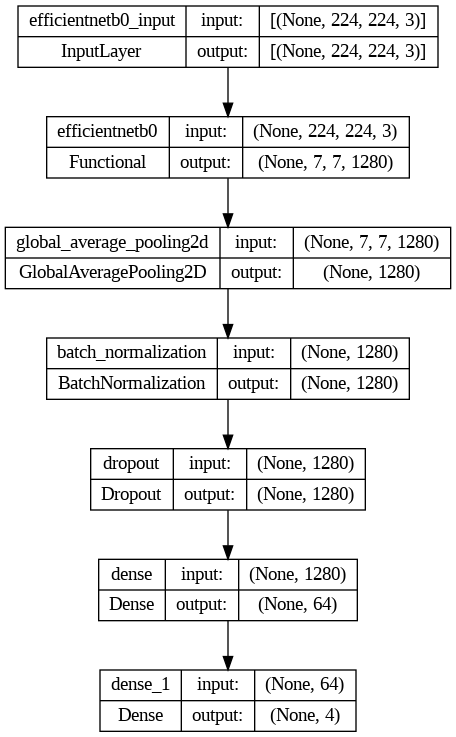

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_aug_tl, show_shapes=True)

## 7.2 Model Training


Pada bagian ini akan diterapkan .fit terhadap train set dan validation set

In [ ]:
# Model training
%%time
history_tl = model_aug_tl.fit(train_set_tl, epochs=20, validation_data=val_set_tl, batch_size=batch_size)

Epoch 1/20
25/25 [==============================] - 97s 3s/step - loss: 0.9506 - accuracy: 0.6603 - val_loss: 0.5439 - val_accuracy: 0.8623
Epoch 2/20
25/25 [==============================] - 85s 3s/step - loss: 0.4071 - accuracy: 0.8677 - val_loss: 0.4233 - val_accuracy: 0.8862
Epoch 3/20
25/25 [==============================] - 84s 3s/step - loss: 0.2964 - accuracy: 0.8957 - val_loss: 0.3556 - val_accuracy: 0.9162
Epoch 4/20
25/25 [==============================] - 91s 4s/step - loss: 0.2768 - accuracy: 0.8931 - val_loss: 0.3176 - val_accuracy: 0.8922
Epoch 5/20
25/25 [==============================] - 82s 3s/step - loss: 0.2373 - accuracy: 0.9173 - val_loss: 0.2555 - val_accuracy: 0.9341
Epoch 6/20
25/25 [==============================] - 89s 4s/step - loss: 0.3044 - accuracy: 0.8817 - val_loss: 0.2016 - val_accuracy: 0.9461
Epoch 7/20
25/25 [==============================] - 91s 4s/step - loss: 0.2332 - accuracy: 0.9173 - val_loss: 0.2174 - val_accuracy: 0.9281
Epoch 8/20
25/25 [==

Berdasarkan 20 epoch memiliki hasil akhir dengan ```Transfer Learning```

- loss = 0.14
- accuracy = 0.94
- val_loss = 0.18
- val_accuracy = 0.94

Hal ini menandakan penerapan ```Transfer Learning``` ke dalam model menghasilkan performa yang sangat baik dengan accuracy 94% dan val_accuracy 94% pada training dan validasi. Model menghasilkan performa yang sangat baik dengan selisih antara accuracy dan val_accuracy yang sangat kecil model termasuk dalam kategori goodfit.

## 7.3 Model Evaulation

Pada bagian ini akan dilakukan evaluasi terhadap performansi model dan percobaan terhadap test set

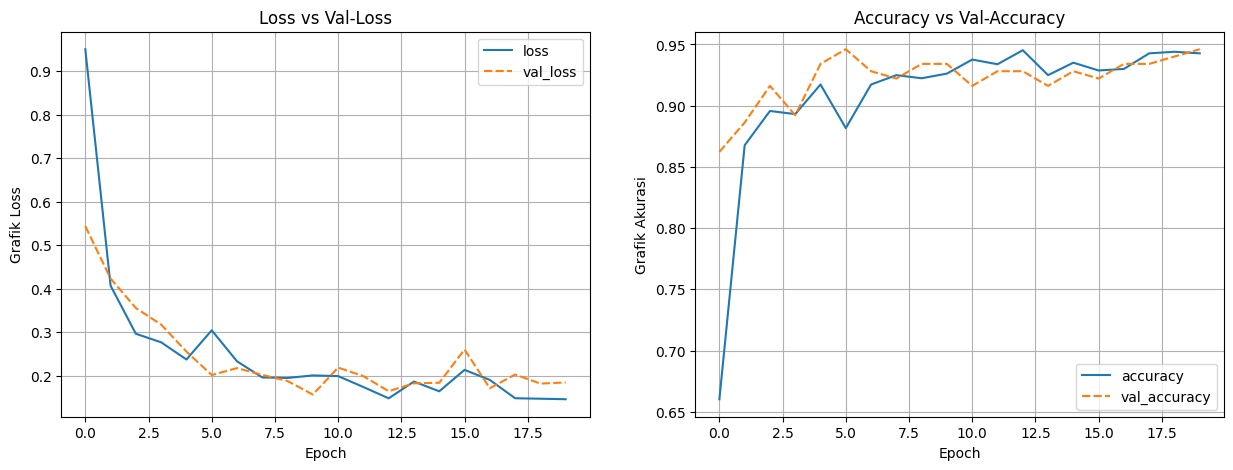

In [ ]:
# Plot training results
history_tl_df = pd.DataFrame(history_tl.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_tl_df[['loss', 'val_loss']])
plt.grid()
plt.ylabel('Grafik Loss')
plt.xlabel('Epoch')
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_tl_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.ylabel('Grafik Akurasi')
plt.xlabel('Epoch')
plt.title('Accuracy vs Val-Accuracy')
plt.show()

- Berdasarkan Grafik Loss dan Val-Loss dapat diketahui bahwa training loss turun secara konsisten dari awal hingga akhir epoch menandakan model belajar dengan baik, nilai validation loss juga turun secara stabil. Dapat dikatakan bahwa model bisa mengenali pola dan memprediksi secara akurat di data baru(val) mungkin masih bisa di improve lagi dengan penambahan early stopping untuk mendapatkan hasil yang lebih optimal.

- Berdasarkan Grafik Accuracy dan Val-Accuracy dapat diketahui bahwa kedua garis antara train dan val saling mendekat dan tidak ekstrem menandakan bahwa model tidak overfit dan tidak underfit. Validation accuracy mencapai 94% bisa jadi proses Data Augmentation membuat val set lebih mudah dipelajari. Dapat dikatakan bahwa model sangat baik dalam mengenali pola dan bisa memprediksi label secara akurat di data baru(val)

In [ ]:
# Mengecek performansi pada test set

# Mendapatkan probabilitas
y_pred_prob_tl = model_aug_tl.predict(test_set_tl)

# Mendapatkan kelas dengan maximum probabilitas
y_pred_class_tl = np.argmax(y_pred_prob_tl, axis=-1)

# Menampilkan Classification Report
print(classification_report(test_set_tl.classes, y_pred_class_tl, target_names=np.array(list(train_set_tl.class_indices.keys()))))

6/6 [==============================] - 14s 2s/step
              precision    recall  f1-score   support

      Cloudy       0.93      0.96      0.95        45
        Rain       1.00      0.97      0.98        33
       Shine       0.94      0.87      0.91        39
     Sunrise       0.95      1.00      0.97        55

    accuracy                           0.95       172
   macro avg       0.96      0.95      0.95       172
weighted avg       0.95      0.95      0.95       172



Berdasarkan hasil Classification Report model dengan ```Transfer Learning``` diketahui pada

- Kelas *Cloudy* model dapat memprediksi kelas tersebut dengan 93% ketepatan dan memiliki nilai recall yang sangat tinggi yaitu 96% dimana model mampu memprediksi kelas cloudy dengan sangat baik.

- Kelas *Rain* model dapat memprediksi kelas tersebut dengan 100% ketepatan dengan performa recall 97% dimana dengan penerapan ```Transfer Learning``` membantu model mengenali kelas rain dengan lebih baik daripada baseline model.

- Kelas *Shine* model dapat memprediksi kelas tersebut dengan 94% ketepatan namun pada kelas shine memiliki nilai recall paling rendah daripada kelas lainnya sebesar 87% tetapi nilai tersebut masih tergolong sangat baik karena diatas 85%.

- Kelas *Sunrise* model dapat memprediksi kelas tersebut dengan nilai ketepatan sebesar 95% dan nilai recall sebesar 100% dengan kata lain model mampu menangkap fitur fitur yang dimiliki oleh kelas sunrise dengan sangat baik.

Secara keseluruhan model pada ANN Improvement memberikan performansi yang sangat baik daripada model ANN Training, dengan menghasilkan accuracy sebesar 95% dimana dari 172 gambar pada test set, sebanyak 163 gambar dapat diklasifikasikan dengan benar. Hal ini menunjukkan bahwa model dapat mengeneralisir kelas dengan sangat baik. Model tidak bias terhadap kelas mayoritas maupun minoritas, dengan penerapan transfer learning membantu memaksimalkan potensi model.  

# 8. MODEL SAVING

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model

In [ ]:
# Proses melakukan model saving, saving model menggunakan model dengan Transfer Learning
model_aug_tl.save("weather_classifier.keras")

Pada bagian model saving, model yang digunakan untuk inference serta deployment adalah model dengan penggunaan ```Transfer Learning``` pada ANN Improvement. Karena model tersebut memiliki performansi paling baik daripada model pada saat ANN Training, dimana pada ANN Training menggunakan model secara baseline. Penggunaan ```Transfer Learning``` terbukti meningkatkan performa model dengan sangat baik dan menghasilkan performa yang sangat tinggi pula. Untuk arsitektur CNN menggunakan Sequential API, karena Sequential API adalah cara paling sederhana dan mudah dipahami untuk membangun model neural network di TensorFlow Keras.

# 9. MODEL INFERENCE

Pada bagian Model Inference akan dilakukan di notebook yang berbeda

# 10. KESIMPULAN

- Kesimpulan dari project ini adalah model yang memberikan performansi terbaik adalah model yang menggunakan proses ```Transfer Learning```di dalamnya, dengan menggunakan proses ```Transfer Learning``` menggunakan ```EfficientNet B0``` mampu meningkatkan performa model daripada model baseline.

- ```EfficientNet B0``` sangat cocok untuk dataset yang memiliki ukuran kecil ke menengah. Berdasarkan Classification Report pada model dengan ```Transfer Learning``` memberikan akurasi model sebesar 95% pada test_set hal ini menandakan bahwa model dapat mempelajari pola dan memprediksi data yang belum pernah dilihat dengan sangat baik.

- Dengan hadirnya Model CNN ini tidak bertujuan untuk menyaingi aplikasi ramalan cuaca yang menggunakan teknologi advance namun untuk mengisi nilai spesifik seperti penerapan pada observasi lokal yang tidak tercover Sensor / aplikasi

Rekomendasi yang dapat diberikan untuk project ini adalah dapat dilakukan eksperimen lebih lanjut untuk mendapatkan parameter yang optimal pada model yang menggunakan ```Transfer Learning``` seperti penerapan EarlyStopping.